This project has been created by [Hubert Kokoszka]() with minor assistance of Laura Jarosz.

It is allowed to copy its parts when properly cited.

#1 Introduction to $F$-test of Two Variances

## $F$-Distribution

Broadly speaking $F$-tests is a group of statistical tests whose test statistics have an $F$-distribution (also called Fisher–Snedecor distribution after Ronald Fisher and George W. Snedecor).

For a variable $X$ to have an $F$-distribution with the degrees of freedom $df_1$ and $df_2$, the following must be true:

$$ X = \frac{S_1/df_1}{S_2/df_2}$$

where $S_1$ and $S_2$ have $\chi^2$-distribution with respective degrees of freedom:

$$S_1 \sim χ_{df_1} ^2$$ $$S_2 \sim χ_{df_2} ^2 $$

##$F$-Test for Equality of Two Variances

This statistical method is used to test the equivalence of variances of two samples of normally-distributed variables.

In other words, when given two samples:

 $X_1 \sim N(\mu_1, σ_1) $ and $X_2 \sim N(\mu_2, σ_2)$,

 the test determines whether $\sigma_1^2 = \sigma_2^2$ is statistically correct.

###The Hypotheses

The null hypothesis:
$$H_0 : \sigma^2_1 = \sigma^2_2$$

One of the alternative hypotheses:
$$H_1 : \sigma^2_1 \neq \sigma^2_2$$

$$H_1 : \sigma^2_1 > \sigma^2_2$$

$$H_1 : \sigma^2_1 < \sigma^2_2$$

### Calculating the $F$ Test Statistic

Let $X_1$ and $X_2$ be normally disttributed samples of sizes $n$ and $m$ respectively.\
 The estimators for the means can be then described as follows:

$$ \overline{X}_1 = \frac{1}{n} \sum_{i=1}^{n}X_{1_i}  $$

$$\overline{X}_2 = \frac{1}{m} \sum_{i=1}^{m}X_{2_i}$$


Given that, the variance estimators may be described as follows:

$$ S_1^2 = \frac{1}{n-1} \sum_{i=1}^{n} \Big( X_{1_i} - \overline{X}_1 \Big)^2 $$

$$ S_2^2 = \frac{1}{m-1} \sum_{i=1}^{m} \Big( X_{2_i} - \overline{X}_2 \Big)^2 $$

The $F$ statistic for the test is calculated with the following formula:

$$ F_{1,1} = \frac{S_1^2}{S_2^2} $$

It is quite intuitive as it represents the ratio of th variance estimators.

### Justifying the $F$ Test Statistic Distribution

In order to illustrate the fact that the $F$ test statistic has an $F$-distribution:

 $$F_{1,2} \sim F(n-1, m-1)$$

 We can derive it in the following way:

Let $SS_1$ and $SS_2$ be defined as sum of squares of the variables $X_1$ and $X_2$ respectively:

$$ SS_1 =  \sum_{i=1}^{n} \Big( X_{1_i} - \overline{X}_1 \Big)^2 $$

$$ SS_2 =  \sum_{i=1}^{m} \Big( X_{2_i} - \overline{X}_2 \Big)^2 $$




It is known that $SS_1$ and $SS_2$ have $\chi^2$-distributions:

$$ SS_1 \sim \chi_{n-1}^2 $$
$$ SS_2 \sim \chi_{m-1}^2 $$

The variance estimators defined with the use of sums of squares may be described as:

$$ S_1^2 = SS_1/(n-1) $$

$$ S_2^2 = SS_2/(m-1) $$


Given the above the $F$ test statisctic may be rewritten as

$$ F_{1,2} = \frac{SS_1/(n-1)}{SS_2/(m-1)}$$

which is consistent with the definition of a variable having $F$-distribution with degrees of freedom $n-1$ and $m-1$.

### Assumptions

It is noteworthy that the $F$ test for equality of two variances is a parametric test that requires the samples to be normally distributed. It is, in fact, exceptionally sensitive to non-normality. Due to that fact I will only generate a random samples with normal distribution.

Further analysis could be conducted to illustrate how the properties change due to devitions form normal distribution.

# 2 Set-up

##Libraries

The following libraries are used in this project:
- `scipy.stats.norm` for generating random samples with normal distribution.
- `scipy.stats.f` for calculating intervals, critical values and p-values obtained from the $F$-distribution.
- `numpy` for the benefits of vectorization and some statistical functions.
- `matplotlib.pyplot` and `seaborn` for results visualization
- `time` for algorythm speed inspection
- `pandas` for data storing and interacting with seaborn

In [ ]:
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import chisquare
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

##Defining `TestOutput` Class and `f_test()` Function

### `TestOutput` Class

In [ ]:
class TestOutput(object):
  """An output of a test: statistic, p-value and confidence intervals

  Given\Attribute:
  statistic - value of the test statistic
  stat_name - name of the statistic (e.g. "F")
  dist_min - minimum value of a distribution: e.g. normal=-Infinity, F=0
  dist_max - maximum value of a distribution: e.g. +Inifinity
  p - p-value of the test
  conf_low - critical value that is the lower bound of confidence interval
  conf_max - critival value that is the upper bound of confidence interval

  """

  def __init__(self, stat: float, stat_name: str, dist_min, dist_max, p: float, conf_low=None, conf_up=None):
    self.stat_name = stat_name
    self.stat = stat
    self.p = p

    if conf_low and conf_up:
      self.ci = f"Confidence interval: ({conf_low} ; {conf_up})"
      self.rr = f"Rejection region: ({dist_min}; {conf_low}) AND ({conf_up}; {dist_max})"
    elif conf_low:
      self.ci = f"Confidence interval: ({conf_low}; {dist_max})"
      self.rr = f"Rejection region: ({dist_min}; {conf_low})"
    elif conf_up:
      self.ci = f"Confidence interval: ({dist_min}; {conf_up})"
      self.rr = f"Rejection region: ({conf_up}; {dist_max})"
    else:
      self.ci = "Cannot compute Confidence interval.\n Check if critical values are provided."
      self.rr = "Cannot compute Rejection Region.\n Check if critical values are provided."


  def __str__(self):
    return self.p_value() + '\n'+ self.statistic() + '\n' + self.ci + '\n' + self.rr + '\n'

  def statistic(self):
    """print the name and value of the test statistic
    """
    return f"{self.stat_name} statistic: {self.stat}"

  def p_value(self):
    """print the p-value of the test
    """
    return f"p-value: {self.p}"

### `f_test()` Function

I decided to create a custom `f_test()` function which returns a `TestOutput` object that I would use for further analysis.

In [ ]:
def f_test(sample1, sample2, alternative: str = "two-sided", alpha: float = 0.05, roundto: int = 6):
  """F-test for two sample variance equality. Returns a dict with three values.

  Given:
  sample1, sample2 - lists or pandas.Series objects of two samples
  alternative - define the alternative hypothesis "two-sided", "greater", "less"
  alpha - significance level of the test
  roundto - number of decimals to use when rounding the number. Default is 6

  Return: a TestOutput object
  """

  x1 = np.array(sample1)
  x2 = np.array(sample2)
  var1 = np.var(x1, ddof=1)
  var2 = np.var(x2, ddof=1)
  df1 = len(x1) - 1
  df2 = len(x2) - 1

  dist_min = 0
  dist_max = "+Inifinity"
  conf_low = None
  conf_up = None

  F_stat = round(var1/var2, roundto)

  if alternative == "two-sided":
    conf_low = round(f.ppf(q=(alpha/2), dfn=df1, dfd=df2), roundto)
    conf_up = round(f.ppf(q=(1-alpha/2), dfn=df1, dfd=df2), roundto)
    p = 1 - f.cdf(x=F_stat, dfn=df1, dfd=df2)
    p_value = round(2 * min(p, 1-p), roundto)

  elif alternative == "greater":
    conf_up = round(f.ppf(1-alpha, df1, df2), roundto)
    p_value = round(1-f.cdf(x=F_stat, dfn=df1, dfd=df2), roundto)

  elif alternative == "less":
    conf_low = round(f.ppf(F_stat, df1, df2), roundto)
    p_value = round(f.cdf(x=F_stat, dfn=df1, dfd=df2), roundto)

  else:
    print("Choose an alternative: two-sided, greater or less")
    return None

  return TestOutput(F_stat,"F", dist_min=dist_min, dist_max=dist_max, p=p_value, conf_low=conf_low, conf_up=conf_up)

### Testing `f_test()` and `TestOutput`

In [ ]:
x = norm.rvs(size=30, loc=1, scale=1)
y = norm.rvs(size=30, loc=10, scale=1)
z = norm.rvs(size=30, loc=1, scale=2)

####Printing the Output of the Test

In [ ]:
print(f_test(x, y))

p-value: 0.829567
F statistic: 0.922519
Confidence interval: (0.475965 ; 2.100996)
Rejection region: (0; 0.475965) AND (2.100996; +Inifinity)



In [ ]:
print(f_test(x, y, roundto=2))

p-value: 0.82
F statistic: 0.92
Confidence interval: (0.48 ; 2.1)
Rejection region: (0; 0.48) AND (2.1; +Inifinity)



In [ ]:
print(f_test(x, z, alternative="less"))

p-value: 5e-05
F statistic: 0.218183
Confidence interval: (0.746706; +Inifinity)
Rejection region: (0; 0.746706)



In [ ]:
print(f_test(x, z, alternative="greater"))

p-value: 0.99995
F statistic: 0.218183
Confidence interval: (0; 1.860811)
Rejection region: (1.860811; +Inifinity)



####Extracting the $F$ Test Statistic

In [ ]:
print(f_test(x, y).statistic())

F statistic: 0.922519


####Extracting the p-value

In [ ]:
print(f_test(x, y).p_value())

p-value: 0.829567


In [ ]:
f_test(x, y).p

0.829567

# 3 Type I Error

##3.1 What is a Type I Error?

A type I error is made when a true null hypothesis is mistakenly rejected. It is sometimes referred to as "false positive" conclusion.

Type I error is quite easily controlled by setting an appriopriate significance level. The lower the significance level, the less likely it becomes for type I error to occur. Low significance levels, however, lower the chances of detecting smaller deviations from the null hypothesis as statistically significant, i.e. the power of the test decreases. The intertwined test power and type II error are considered in later parts of this project.

## 3.2 Assessing the Probability of Making a Type I Error

To get an esimate of the probability of Type I Error of the $F$ test for equal variances, the following approach may be utilised:

1. Randomly sample two normally distributed variables with equal standard deviations (i.e. equal variances).
2. Carry out the F test and save the p-value, e.g. in a list.
3. Repeat steps 1. and 2. $m$ times, where $m$ is a large number of simulations.
4. Compare all saved p-values with the significance level (e.g. $\alpha$ = 5%) and calculate the empirical probability ($\hat{p}$) of the p-value being smaller
than $\alpha$

$$\hat{p}= \frac{1}{m}\sum_{j=1}^m I_j$$

$$I_j=\left\{
\begin{array}{ccc}
1&\mbox{for}&p_j<\alpha\\
0&\mbox{for}&p_j\geq\alpha\\
\end{array}
\right.$$

5. Finally the standard error of the empirical type I error may be calulated according to the formula:

$$ SE(\hat{p}) = \sqrt{\frac{\hat{p}*(1-\hat{p})}{m}} $$


## 3.3 `get_type_I_error()` function

In order to carry out the Monte Carlo simulation, I created a custom function that applies all the steps mentioned above. It's parameters allow it to test out different sample sizes, numbers of simulations, significance levels, sample means and standard deviations.

In [ ]:
def get_type_I_error(n:int=30, m:int=1000, alpha:float=0.05, mu1:float=0,
                     mu2:float=0, var:float=1, roundto:int=6) -> tuple:
  """Get F test type II error

  Given:
  n - one sample size
  m - number of simulations
  alpha - significance level
  mu1 - true mean of the first sample
  mu2 - true mean of the second sample
  var - variance, true for both samples
  roundto - number of decimals numbers to round the returned values.

  Return: A tuple with values:
  [0] - empirical probability of type I error
  [1] - standard error of type I error
  """
  sd = np.sqrt(var)
  p_values = np.empty(m)

  for index in range(m):
    X1 = norm.rvs(size=n, loc=mu1, scale=sd)
    X2 = norm.rvs(size=n, loc=mu2, scale=sd)
    ftest_output = f_test(X1, X2, alpha=alpha,
                          alternative="two-sided")
    p_values[index] = ftest_output.p

  p_hat = np.mean(p_values < alpha)
  se_hat = round(np.sqrt(p_hat *(1-p_hat)/m), roundto)

  return (round(p_hat, roundto), se_hat)

### 3.3.1 Testing out different numbers of simulations $m$

In [ ]:
different_m = [10, 100, 1000, 10_000, 100_000]

testing_m_df = pd.DataFrame({"m" : [],
                          "p_hat" : [],
                          "se_hat" : [],
                          "duration[s]" : []})

for m in different_m:
  start = time.time()
  p_hat, se_hat = get_type_I_error(m=m)
  end = time.time()
  testing_m_df.loc[len(testing_m_df)] = {"m" : m,
                                          "p_hat" : p_hat,
                                          "se_hat" : se_hat,
                                          "duration[s]" : end-start}

In [ ]:
testing_m_df

,m,p_hat,se_hat,duration[s]
0,10,0.10000,0.094868,0.017497
1,100,0.03000,0.017059,0.078901
2,1000,0.06100,0.007568,0.812387
3,10000,0.05260,0.002232,8.117163
4,100000,0.04963,0.000687,109.960486


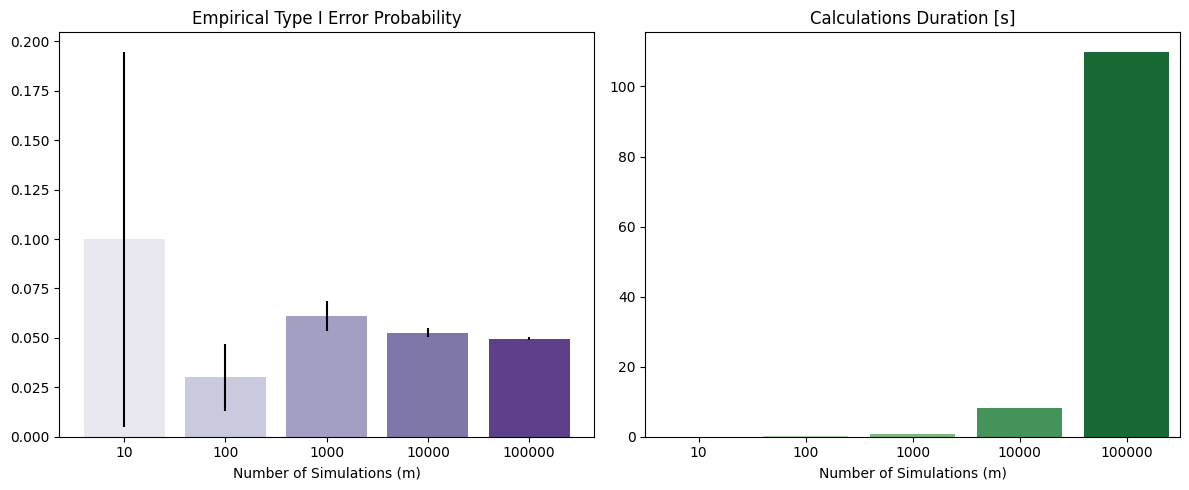

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#type I empirical probability
sns.barplot(data=testing_m_df,
            x="m",
            y="p_hat",
            palette="Purples",
            ax=axes[0])
axes[0].set_title("Empirical Type I Error Probability")
axes[0].set_ylabel('')
axes[0].set_xlabel("Number of Simulations (m)")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0].patches]
y_coords = [p.get_height() for p in axes[0].patches]
axes[0].errorbar(x=x_coords, y=y_coords, yerr=testing_m_df["se_hat"], fmt="none", c="k")

#duration
sns.barplot(data=testing_m_df,
            x="m",
            y="duration[s]",
            palette="Greens",
            ax=axes[1])
axes[1].set_title("Calculations Duration [s]")
axes[1].set_ylabel('')
axes[1].set_xlabel("Number of Simulations (m)")

plt.tight_layout()
plt.show()


It is known that a high number of simulations $m$ gives better estimations. Such is the case here as well. At 1000 simulations and more, the empirical type I error probability $\hat{p}$ stays relatively consistent. Every time $m$ is multiplied by 10, the standard error of $\hat{p}$ falls logarithmically. The opposite applies for the duration of the algorithm execution. I decided to always do 10 000 simuations for the sake of the convenience of it taking only about 8 seconds to complete when considering 30-sized samples.

### 3.3.2 Is the empirical type I error of the F test for equal variances related to the sample sizes?

In [ ]:
different_n = [5, 10, 30, 50, 100, 500, 1000]

testing_n_df = pd.DataFrame({"n" : [],
                          "p_hat" : [],
                          "se_hat" : []})

for n in different_n:
  p_hat, se_hat = get_type_I_error(m=10_000, n=n)
  testing_n_df.loc[len(testing_n_df)] = {"n" : n,
                                          "p_hat" : p_hat,
                                          "se_hat" : se_hat}

In [ ]:
testing_n_df

,n,p_hat,se_hat
0,5,0.0497,0.002173
1,10,0.0470,0.002116
2,30,0.0490,0.002159
3,50,0.0511,0.002202
4,100,0.0471,0.002119
5,500,0.0542,0.002264
6,1000,0.0494,0.002167


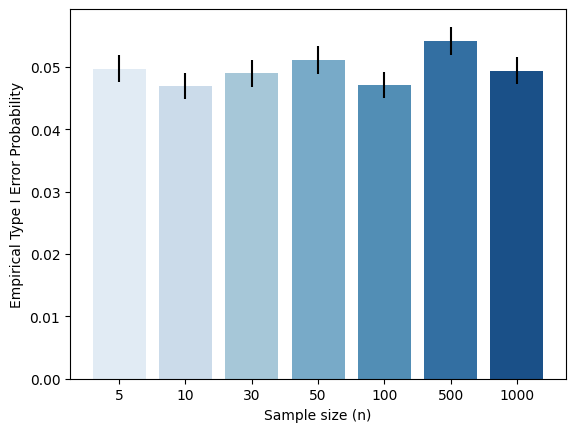

In [ ]:
ax = sns.barplot(data=testing_n_df,
                 x="n",
                 y="p_hat",
                 palette="Blues")

ax.set_ylabel("Empirical Type I Error Probability")
ax.set_xlabel("Sample size (n)")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=testing_n_df["se_hat"], fmt="none", c="k")

plt.show()


It seems that regardless of the sample size, the empirical type I error always tends to be close to 0.05 with the standard error of around 0.0225.

###3.3.3 Testing out different significance levels


In [ ]:
different_alpha = [0.01, 0.025, 0.05, 0.1]

testing_alpha_df = pd.DataFrame({"alpha" : [],
                          "p_hat" : [],
                          "se_hat" : []})

for alpha in different_alpha:
  p_hat, se_hat = get_type_I_error(m=10_000, n=30, alpha=alpha)
  testing_alpha_df.loc[len(testing_alpha_df)] = {"alpha" : alpha,
                                          "p_hat" : p_hat,
                                          "se_hat" : se_hat}

In [ ]:
testing_alpha_df

,alpha,p_hat,se_hat
0,0.010,0.0109,0.001038
1,0.025,0.0253,0.001570
2,0.050,0.0501,0.002182
3,0.100,0.0985,0.002980


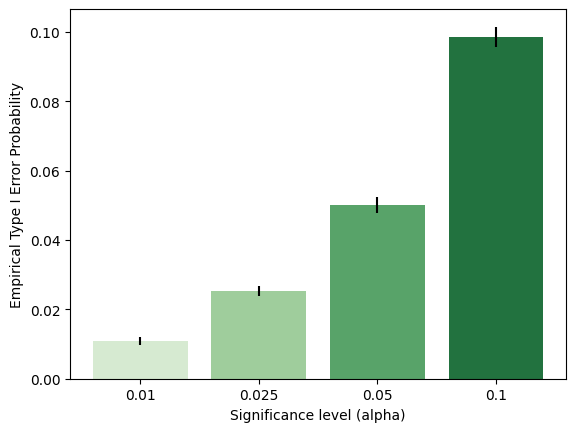

In [ ]:
ax = sns.barplot(data=testing_alpha_df,
                 x="alpha",
                 y="p_hat",
                 palette="Greens")

ax.set_ylabel("Empirical Type I Error Probability")
ax.set_xlabel("Significance level (alpha)")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=testing_alpha_df["se_hat"], fmt="none", c="k")

plt.show()

The empirical type I error is strictly related to the set significance level and by definition these two values are approximately the same. Moreover, significance levels and standard errors seem to be correlated. Small significance level, means small standard error.

###3.3.4 The means and standard deviation of samples.

As the $F$ statistic is defined by the ratio of variances, the actual values of variances and means should not influence the decision making when the null hypothesis is true. To illustrate that, the following simulations have been conducted:

Testing different means of the second samples. (The default for both sample means is 0)

In [ ]:
different_mu2 = [-1000, -100, -10, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 10, 100, 1000]

testing_mu2_df = pd.DataFrame({"mu2" : [],
                          "p_hat" : [],
                          "se_hat" : []})

for mu2 in different_mu2:
  p_hat, se_hat = get_type_I_error(m=10_000, n=30, alpha=0.05, mu2=mu2)
  testing_mu2_df.loc[len(testing_mu2_df)] = {"mu2" : mu2,
                                          "p_hat" : p_hat,
                                          "se_hat" : se_hat}

In [ ]:
different_var = [0.1, 0.5, 1, 10, 100, 1000]

testing_var_df = pd.DataFrame({"var" : [],
                          "p_hat" : [],
                          "se_hat" : []})

for var in different_var:
  p_hat, se_hat = get_type_I_error(m=10_000, n=30, alpha=0.05, var=var)
  testing_var_df.loc[len(testing_var_df)] = {"var" : var,
                                             "p_hat" : p_hat,
                                             "se_hat" : se_hat}

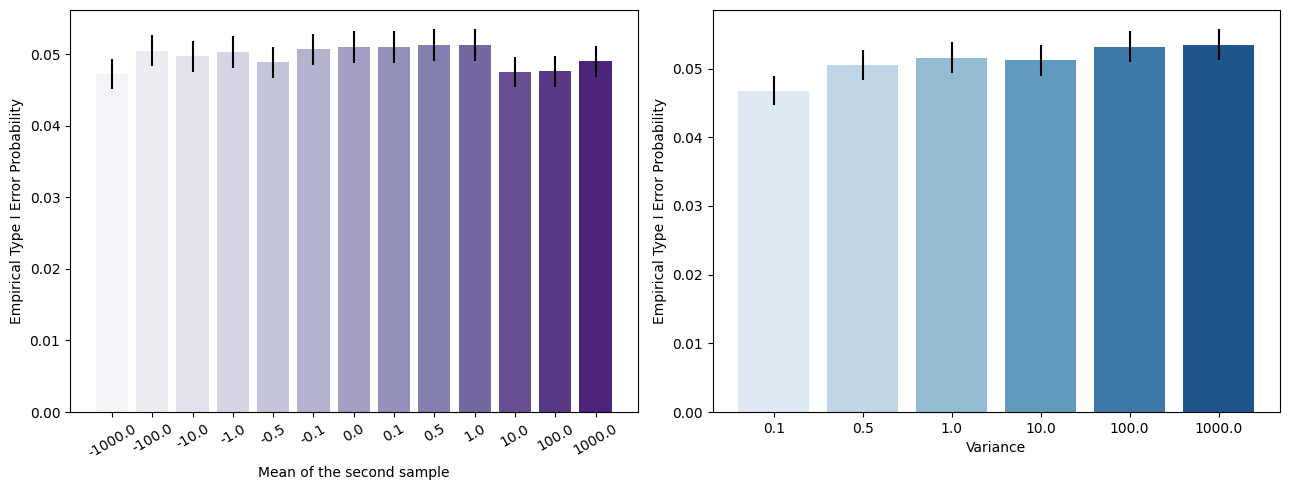

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

#type I empirical probability
sns.barplot(data=testing_mu2_df,
            x="mu2",
            y="p_hat",
            palette="Purples",
            ax=axes[0])

axes[0].set_ylabel("Empirical Type I Error Probability")
axes[0].set_xlabel("Mean of the second sample")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0].patches]
y_coords = [p.get_height() for p in axes[0].patches]
axes[0].errorbar(x=x_coords, y=y_coords, yerr=testing_mu2_df["se_hat"], fmt="none", c="k")
axes[0].tick_params(axis='x', labelrotation=30)

#standard error
sns.barplot(data=testing_var_df,
            x="var",
            y="p_hat",
            palette="Blues",
            ax=axes[1])

axes[1].set_ylabel("Empirical Type I Error Probability")
axes[1].set_xlabel("Variance")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[1].patches]
y_coords = [p.get_height() for p in axes[1].patches]
axes[1].errorbar(x=x_coords, y=y_coords, yerr=testing_var_df["se_hat"], fmt="none", c="k")

plt.tight_layout()
plt.show()

As suspected, there is no explicit correlation between the empirical type I error probability and neither the mean of the second sample nor the standard deviation, when the null hypothesis is true.

# 4 Type II Error and Test Power

##4.1 Type II Error and its Relation to Test Power

A type II error is made when an untrue null hypothesis is mistakenly not rejected. It is sometimes referred to as "false negative" conclusion.

The probability of not making type II error is called the test power. The higher the test power, the smaller differences between null and alternative hypotheses may be detected as statistically significant. The smaller the significance level, the smaller the test power which means that it is impossible to minimize both type errors at the same time.

##4.2 Assesing the Test Power

To get an esimate of the power of $F$ test for equal variances, the following approach may be utilised:

1. Randomly sample two normally distributed variables with differing deviations (i.e. unequal variances).
2. Carry out the F test and save the p-value, e.g. in a list.
3. Repeat steps 1. and 2. $m$ times, where $m$ is a large number of simulations.
4. Compare all saved p-values with the significance level (e.g. $\alpha$ = 5%) and calculate the power ($Pr$) as the fraction of the p-values smaller
than $\alpha$.

$$Pr= \frac{1}{m}\sum_{j=1}^m I_j$$

$$I_j=\left\{
\begin{array}{ccc}
1&\mbox{for}&p_j<\alpha\\
0&\mbox{for}&p_j\geq\alpha\\
\end{array}
\right.$$

5. Calculate the power standard error according to the following formula:

$$SE(Pr) = \sqrt{\frac{Pr \times (1-Pr)}{m}} $$


6. Calculate the empirical probability of type II error.

$$\beta = 1 - Pr$$

##4.3 `get_power()` function

In [ ]:
def get_power(n:int=30, m:int=1000, alpha:float=0.05, mu1:float=0, mu2:float=0,
              var1:float=1, var2:float=1.5, roundto:int=6):
  """
  n - sample size
  m - number of simulations
  alpha - significance level
  mu1 - true mean of the first sample
  mu2 - true mean of the second sample
  sd1 - true standard deviation of the first sample
  sd2 - true standard deviation of the first sample
  roundto - number of decimals numbers to round the returned values.

  Return: A tuple of floats:
  [0] - power of the test
  [1] - standard error of the power
  [2] - empirical type II error probability
  """
  sd1 = np.sqrt(var1)
  sd2 = np.sqrt(var2)
  p_values = np.empty(m)

  for index in range(m):
    X1 = norm.rvs(size=n, loc=mu1, scale=sd1)
    X2 = norm.rvs(size=n, loc=mu2, scale=sd2)
    ftest_output = f_test(X1, X2, alpha=alpha, alternative="two-sided")
    p_values[index] = ftest_output.p

  power = np.mean(p_values <= 0.05)
  se_power = round(np.sqrt(power * (1-power)/m), roundto)
  type_II_error = round((1 - power), roundto)

  return round(power, roundto), se_power, type_II_error

In [ ]:
get_power(m=100, sd2=1.2)

(0.18, 0.038419, 0.82)

###4.3.1 Testing out different numbers of simulations $m$.

In [ ]:
different_m_II = [10, 100, 1000, 10_000, 100_000]

testing_m_df_II = pd.DataFrame({"m" : [],
                             "power" : [],
                             "se" : [],
                             "beta" : [],
                             "duration[s]" : []})

for m in different_m_II:
  start = time.time()
  power, se, beta = get_power(m=m)
  end = time.time()
  testing_m_df_II.loc[len(testing_m_df_II)] = {"m" : m,
                                         "power" : power,
                                         "se" : se,
                                         "beta" : beta,
                                         "duration[s]" : end-start}

In [ ]:
testing_m_df_II

,m,power,se,beta,duration[s]
0,10,0.60000,0.154919,0.40000,0.038412
1,100,0.69000,0.046249,0.31000,0.292736
2,1000,0.56700,0.015669,0.43300,1.783023
3,10000,0.57150,0.004949,0.42850,14.180460
4,100000,0.57597,0.001563,0.42403,94.159846


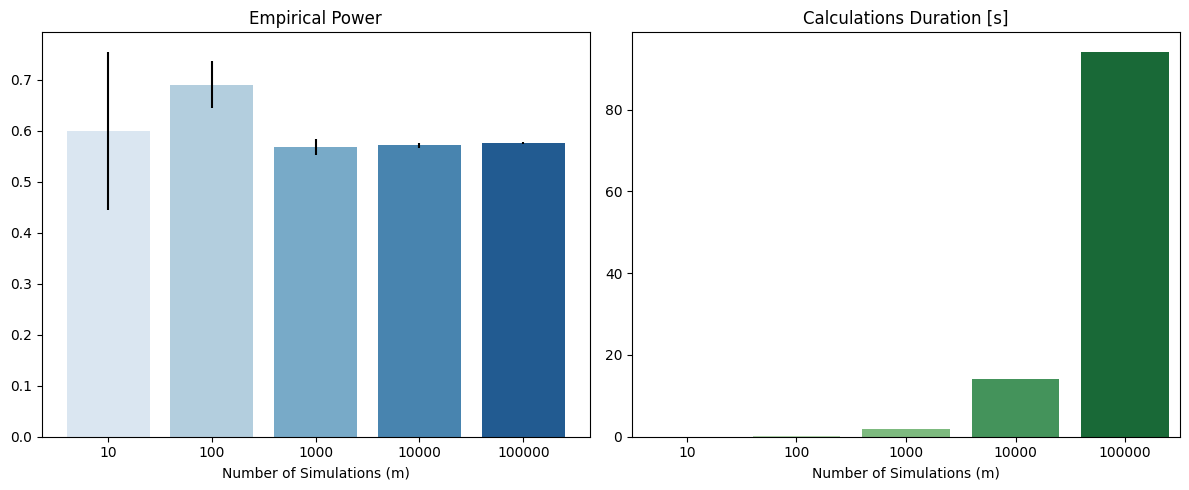

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#power
sns.barplot(data=testing_m_df_II,
            x="m",
            y="power",
            palette="Blues",
            ax=axes[0])
axes[0].set_title("Empirical Power")
axes[0].set_ylabel('')
axes[0].set_xlabel("Number of Simulations (m)")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in axes[0].patches]
y_coords = [p.get_height() for p in axes[0].patches]
axes[0].errorbar(x=x_coords, y=y_coords, yerr=testing_m_df_II["se"], fmt="none", c="k")

#duration
sns.barplot(data=testing_m_df_II,
            x="m",
            y="duration[s]",
            palette="Greens",
            ax=axes[1])
axes[1].set_title("Calculations Duration [s]")
axes[1].set_ylabel('')
axes[1].set_xlabel("Number of Simulations (m)")

plt.tight_layout()
plt.show()

Similarly to type I error, the number of simulations ($m$) stabilizes the results when at 1000 or more. Every time $m$ rises, the standard error of empirical power falls. The power itself stays at relatively the same level of about 57-58% (which is not sufficient). The default ratio of varinaces is 1.5 here.

### 4.3.2 Testing out different sample sizes

In [ ]:
different_n_II = [5, 10, 30, 50, 100, 500, 1000]

testing_n_df_II = pd.DataFrame({"n" : [],
                                "power" : [],
                                "se" : [],
                                "beta" : []})

for n in different_n_II:
  power, se, beta = get_power(m=10_000, n=n)
  testing_n_df_II.loc[len(testing_n_df_II)] = {"n" : n,
                                               "power" : power,
                                               "se" : se,
                                               "beta" : beta}

In [ ]:
testing_n_df_II

,n,power,se,beta
0,5,0.0997,0.002996,0.9003
1,10,0.2020,0.004015,0.7980
2,30,0.5709,0.004949,0.4291
3,50,0.8016,0.003988,0.1984
4,100,0.9790,0.001434,0.0210
5,500,1.0000,0.000000,0.0000
6,1000,1.0000,0.000000,0.0000


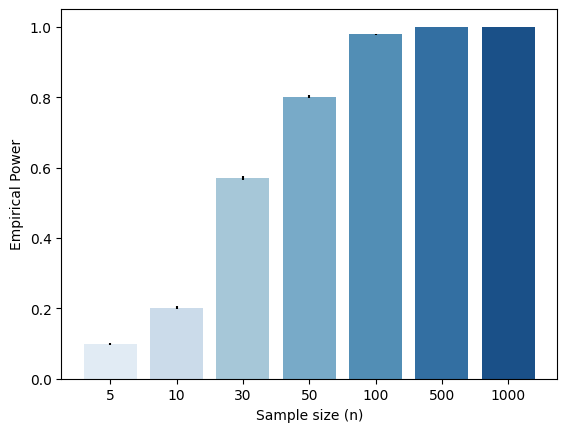

In [ ]:
ax = sns.barplot(data=testing_n_df_II,
                 x="n",
                 y="power",
                 palette="Blues")

ax.set_ylabel("Empirical Power")
ax.set_xlabel("Sample size (n)")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=testing_n_df_II["se"], fmt="none", c="k")

plt.show()

As suspected the size of the samples positively affects the power of the F test, being appr. 98% at the size of 100. Which I will use in the following analysis.

###4.3.3 Testing out different significance levels

In [ ]:
different_alpha = [0.01, 0.025, 0.05, 0.1]

testing_alpha_df_II = pd.DataFrame({"alpha" : [],
                                "power" : [],
                                "se" : [],
                                "beta" : []})

for alpha in different_alpha:
  power, se, beta = get_power(m=10_000, n=100, alpha=alpha)
  testing_alpha_df_II.loc[len(testing_alpha_df_II)] = {"alpha" : alpha,
                                               "power" : power,
                                               "se" : se,
                                               "beta" : beta}

In [ ]:
testing_alpha_df_II

,alpha,power,se,beta
0,0.010,0.9790,0.001434,0.0210
1,0.025,0.9821,0.001326,0.0179
2,0.050,0.9793,0.001424,0.0207
3,0.100,0.9815,0.001348,0.0185


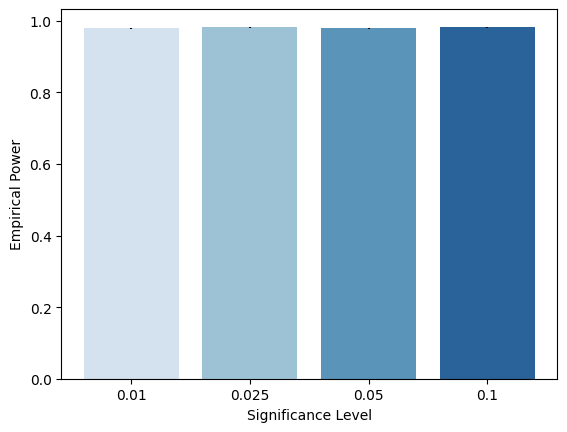

In [ ]:
ax = sns.barplot(data=testing_alpha_df_II,
                 x="alpha",
                 y="power",
                 palette="Blues")

ax.set_ylabel("Empirical Power")
ax.set_xlabel("Significance Level")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=testing_alpha_df_II["se"], fmt="none", c="k")

plt.show()

The power of a test is unrelated to the significance level and as such we get no variation of power when considering different sig. levels.

###4.3.4 Testing out several variance differences

In [ ]:
var1 = 1
different_alt_var = np.linspace(start=0.1*var1, stop=2.5*var1, num=100)

testing_alt_var = pd.DataFrame({
    "power":[],
    "se" : [],
    "beta" : [],
    "var_ratio" : []
})

for alt_var in different_alt_var:
  power, se, beta = get_power(m=1000, n=100, alpha=0.05, var1=1, var2=alt_var)
  testing_alt_var.loc[len(testing_alt_var)] = {
                                               "power" : power,
                                               "se" : se,
                                               "beta" : beta,
                                               "var_ratio":alt_var}

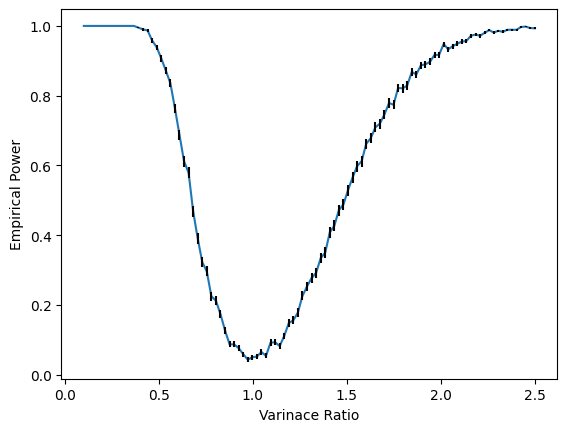

In [ ]:
ax = sns.lineplot(data=testing_alt_var,
                 x="var_ratio",
                 y="power")

ax.set_ylabel("Empirical Power")
ax.set_xlabel("Varinace Ratio")

ax.errorbar(x=testing_alt_var["var_ratio"],
            y=testing_alt_var["power"],
            yerr=testing_alt_var["se"],
            fmt="none", c="k")

plt.show()